In [1]:
import numpy as np
import MigPreFuncoes
from scipy.fft import fft,rfft, rfftfreq, irfft
import matplotlib.pyplot as plt
import importlib
import SlantStack
from tqdm import tqdm

Imported MigPreFuncoes now
Imported SlantStack now


In [2]:
importlib.reload(MigPreFuncoes)
importlib.reload(SlantStack)

Imported MigPreFuncoes now
Imported SlantStack now


<module 'SlantStack' from 'C:\\Users\\guilh\\Desktop\\Code\\SeismicDiffractions\\SlantStack.py'>

In [153]:
def slant_local(data1,x_ini,z_ini,dx,dz,x0,z0,p):
    """
    Calcula a semblance para o ponto imagem de acordo com a inclinação determinada
    
    Entrada:
    data1 -
    x_ini -
    z_ini -
    dx -
    x0 -
    y0 -
    p -
    
    Saída:
    s -
    x_grid -
    z_grid -
    """
    
    [nz1,ntr1]=data1.shape
    dataC = data1.copy()
    
    #dataCC = dataC.copy()
    
    #x = np.arange(x_ini*dx,(x_ini+ntr1)*dx,dx)
    #z = p*(x-x0) + z0
    #x_grid = np.int64((np.round(x/dx))-x_ini)
    #z_grid = np.int64(np.round(z/dz)-z_ini)
    
    x = np.arange(x_ini,(x_ini+ntr1),1)
    z = p*(x-x0) + z0
    x_grid = np.int64((np.round(x))-x_ini)
    z_grid = np.int64(np.round(z)-z_ini)
    
    s_n = 0
    s_d = 0
    
    plot = "no" #WARNING! Change only for debugging!
    
    if plot=="yes":
        plt.imshow(dataC, aspect="auto")
        print(f"shape da matriz = {data1.shape}")
        print(f"ponto imagem = [{z0},{x0}]")
        print(f"p = {p}")
        print(f"x_grid = {x_grid}")
        print(f"z_grid = {z_grid}")
        #plt.plot(x0/dx,z0/dz,"bo")
    
    for k in range(ntr1):
        if (x_grid[k]<ntr1) and (z_grid[k]>=0 and z_grid[k]<nz1):
            s_n += dataC[z_grid[k],x_grid[k]]
            s_d += dataC[z_grid[k],x_grid[k]]**2
            
            #dataCC[z_grid[k],x_grid[k]] = 10
            
            if plot=="yes":
                plt.plot(x_grid[k],z_grid[k],"r.")
    
    if s_d == 0:
        s=1e-16 #avoid nan's
    else:
        s = s_n**2/ntr1/s_d
    
    if plot=="yes":
        plt.show()
        print(f"s = {s}")
    
    #plt.imshow(dataCC, aspect="auto", extent=[0,nx*dx,nz*dz,0])
    #plt.show()
    
    return s, x_grid, z_grid

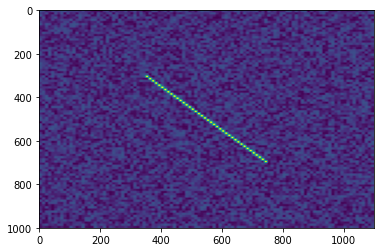

In [136]:
nx = 110
nz = 100
dx=dz=10
dummy_matrix = np.zeros([nx,nz])
        
#x_ini_1 = 5
#x_fim_1 = 15

np.random.seed(24)
nn = np.random.rand(nx,nz)
dummy_matrix = dummy_matrix+(nn-0.5)*0.3

xs = np.arange(35,75,1)
zs = np.arange(30,70,1)

for i in range(len(xs)):
    dummy_matrix[(xs[i]),(zs[i])] = 1

#for i in range(x_ini_1,x_fim_1):
#    z = 15
#    dummy_matrix[i,z]=1
    

plt.imshow(dummy_matrix.T,aspect="auto",extent=[0,nx*dx,nz*dz,0])
plt.show()

shape da matriz = (100, 110)
ponto imagem = [45,50]
p = 1
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [ -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12
  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30
  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102
 103 104]


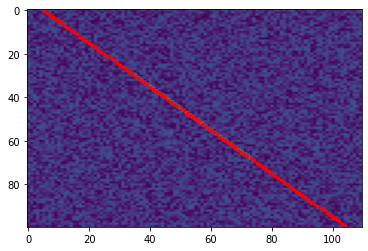

s = 0.352270482451095


In [145]:
#x0 = np.round(nx/2)
#z0 = np.round(nz/2)
x0 = 50          
z0 = 45          
x_ini=z_ini=0

p = 1

s,x_grid,z_grid = slant_local(dummy_matrix.T,x_ini,z_ini,dx,dz,x0,z0,p)

In [154]:
def slant_local_p(data1,x_ini,z_ini,dx,dz,x0,z0,pmin,pmax,dp):
    """
    Calcula a semblance para o ponto imagem para diferentes inclinações (pmin,pmax,dp)
    
    Entrada:
    data1 -
    x_ini -
    z_ini -
    dx -
    x0 -
    y0 -
    pmin -
    pmax -
    dp -
    
    Saída:
    Smax - 
    pmax - inclinação que gera a semblance máxima
    """ 
    ps = np.arange(pmin,pmax,dp) #lista com as inclinações a serem testadas 
    
    #print(f"ps = {ps}")
    
    Smax = 0
    pmax = 0
    
    for ip in range(len(ps)):
        S,x,z = slant_local(data1,x_ini,z_ini,dx,dz,x0,z0,ps[ip])
        
        if S>Smax:
            Smax = S
            pmax = ps[ip]
            
    return Smax,pmax

shape da matriz = (100, 110)
ponto imagem = [45,50]
p = -1.5
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [120 118 117 116 114 112 111 110 108 106 105 104 102 100  99  98  96  94
  93  92  90  88  87  86  84  82  81  80  78  76  75  74  72  70  69  68
  66  64  63  62  60  58  57  56  54  52  51  50  48  46  45  44  42  40
  39  38  36  34  33  32  30  28  27  26  24  22  21  20  18  16  15  14
  12  10   9   8   6   4   3   2   0  -2  -3  -4  -6  -8  -9 -10 -12 -14
 -15 -16 -18 -20 -21 -22 -24 -26 -27 -28 -30 -32 -33 -34 -36 -38 -39 -40
 -42 -44]


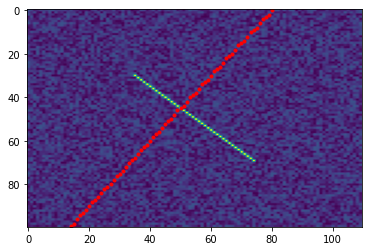

s = 0.0022897915745302747
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = -1.4
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [115 114 112 111 109 108 107 105 104 102 101 100  98  97  95  94  93  91
  90  88  87  86  84  83  81  80  79  77  76  74  73  72  70  69  67  66
  65  63  62  60  59  58  56  55  53  52  51  49  48  46  45  44  42  41
  39  38  37  35  34  32  31  30  28  27  25  24  23  21  20  18  17  16
  14  13  11  10   9   7   6   4   3   2   0  -1  -3  -4  -5  -7  -8 -10
 -11 -12 -14 -15 -17 -18 -19 -21 -22 -24 -25 -26 -28 -29 -31 -32 -33 -35
 -36 -38]

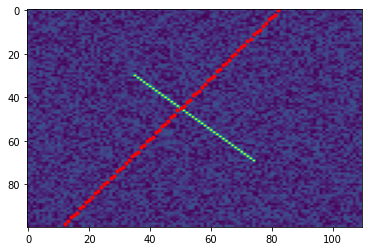

s = 0.0037705101641485063
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = -1.2999999999999998
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [110 109 107 106 105 104 102 101 100  98  97  96  94  93  92  90  89  88
  87  85  84  83  81  80  79  78  76  75  74  72  71  70  68  67  66  64
  63  62  61  59  58  57  55  54  53  52  50  49  48  46  45  44  42  41
  40  38  37  36  35  33  32  31  29  28  27  26  24  23  22  20  19  18
  16  15  14  13  11  10   9   7   6   5   3   2   1   0  -2  -3  -4  -6
  -7  -8 -10 -11 -12 -13 -15 -16 -17 -19 -20 -21 -23 -24 -25 -26 -2

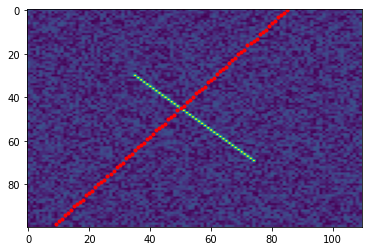

s = 0.004679626032726177
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = -1.1999999999999997
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [105 104 103 101 100  99  98  97  95  94  93  92  91  89  88  87  86  85
  83  82  81  80  79  77  76  75  74  73  71  70  69  68  67  65  64  63
  62  61  59  58  57  56  55  53  52  51  50  49  47  46  45  44  43  41
  40  39  38  37  35  34  33  32  31  29  28  27  26  25  23  22  21  20
  19  17  16  15  14  13  11  10   9   8   7   5   4   3   2   1  -1  -2
  -3  -4  -5  -7  -8  -9 -10 -11 -13 -14 -15 -16 -17 -19 -20 -21 -22

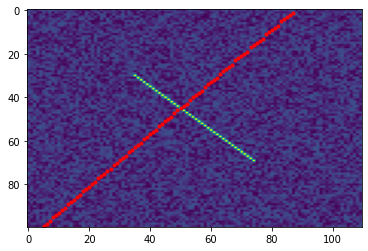

s = 0.00488092247499109
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = -1.0999999999999996
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [100  99  98  97  96  94  93  92  91  90  89  88  87  86  85  83  82  81
  80  79  78  77  76  75  74  72  71  70  69  68  67  66  65  64  63  61
  60  59  58  57  56  55  54  53  52  50  49  48  47  46  45  44  43  42
  41  40  38  37  36  35  34  33  32  31  30  29  27  26  25  24  23  22
  21  20  19  18  16  15  14  13  12  11  10   9   8   7   5   4   3   2
   1   0  -1  -2  -3  -4  -6  -7  -8  -9 -10 -11 -12 -13 -14 -15 -17 

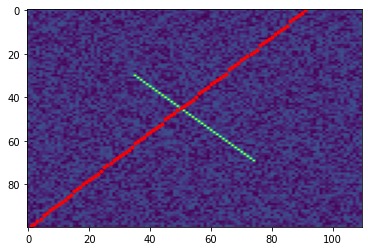

s = 0.0013114521135004606
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = -0.9999999999999996
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [ 95  94  93  92  91  90  89  88  87  86  85  84  83  82  81  80  79  78
  77  76  75  74  73  72  71  70  69  68  67  66  65  64  63  62  61  60
  59  58  57  56  55  54  53  52  51  50  49  48  47  46  45  44  43  42
  41  40  39  38  37  36  35  34  33  32  31  30  29  28  27  26  25  24
  23  22  21  20  19  18  17  16  15  14  13  12  11  10   9   8   7   6
   5   4   3   2   1   0  -1  -2  -3  -4  -5  -6  -7  -8  -9 -10 -1

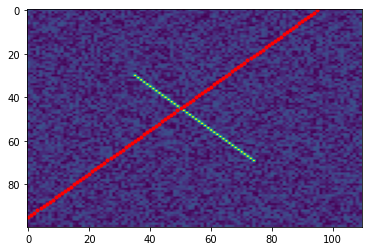

s = 0.003087944432338035
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = -0.8999999999999995
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [90 89 88 87 86 85 85 84 83 82 81 80 79 78 77 76 76 75 74 73 72 71 70 69
 68 67 67 66 65 64 63 62 61 60 59 58 58 57 56 55 54 53 52 51 50 50 49 48
 47 46 45 44 43 42 41 40 40 39 38 37 36 35 34 33 32 32 31 30 29 28 27 26
 25 24 23 23 22 21 20 19 18 17 16 15 14 14 13 12 11 10  9  8  7  6  5  5
  4  3  2  1  0 -1 -2 -3 -4 -4 -5 -6 -7 -8]


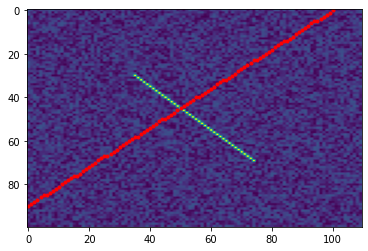

s = 0.007184241665656971
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = -0.7999999999999994
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [85 84 83 83 82 81 80 79 79 78 77 76 75 75 74 73 72 71 71 70 69 68 67 67
 66 65 64 63 63 62 61 60 59 59 58 57 56 55 55 54 53 52 51 51 50 49 48 47
 47 46 45 44 43 43 42 41 40 39 39 38 37 36 35 35 34 33 32 31 31 30 29 28
 27 27 26 25 24 23 23 22 21 20 19 19 18 17 16 15 15 14 13 12 11 11 10  9
  8  7  7  6  5  4  3  3  2  1  0 -1 -1 -2]


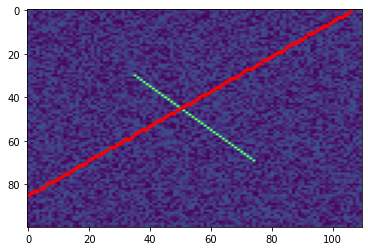

s = 0.00048265592976013327
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = -0.6999999999999993
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [80 79 79 78 77 76 76 75 74 74 73 72 72 71 70 69 69 68 67 67 66 65 65 64
 63 62 62 61 60 60 59 58 58 57 56 55 55 54 53 53 52 51 51 50 49 48 48 47
 46 46 45 44 44 43 42 42 41 40 39 39 38 37 37 36 35 35 34 33 32 32 31 30
 30 29 28 28 27 26 25 25 24 23 23 22 21 21 20 19 18 18 17 16 16 15 14 14
 13 12 11 11 10  9  9  8  7  7  6  5  4  4]


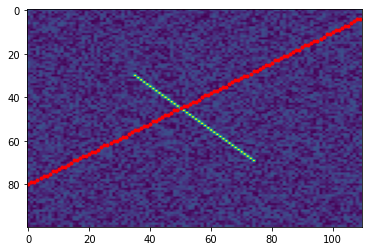

s = 0.0001242461427445254
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = -0.5999999999999992
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [75 74 74 73 73 72 71 71 70 70 69 68 68 67 67 66 65 65 64 64 63 62 62 61
 61 60 59 59 58 58 57 56 56 55 55 54 53 53 52 52 51 50 50 49 49 48 47 47
 46 46 45 44 44 43 43 42 41 41 40 40 39 38 38 37 37 36 35 35 34 34 33 32
 32 31 31 30 29 29 28 28 27 26 26 25 25 24 23 23 22 22 21 20 20 19 19 18
 17 17 16 16 15 14 14 13 13 12 11 11 10 10]


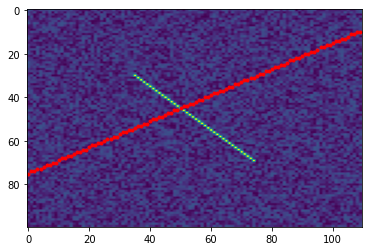

s = 0.022245249392552232
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = -0.4999999999999991
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [70 69 69 68 68 67 67 66 66 65 65 64 64 63 63 62 62 61 61 60 60 59 59 58
 58 57 57 56 56 55 55 54 54 53 53 52 52 51 51 50 50 49 49 48 48 47 47 46
 46 46 45 44 44 44 43 43 42 42 41 41 40 40 39 39 38 38 37 37 36 36 35 35
 34 34 33 33 32 32 31 31 30 30 29 29 28 28 27 27 26 26 25 25 24 24 23 23
 22 22 21 21 20 20 19 19 18 18 17 17 16 16]


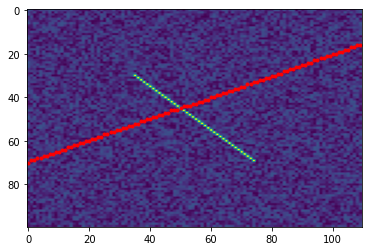

s = 0.0013246507403178202
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = -0.399999999999999
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [65 65 64 64 63 63 63 62 62 61 61 61 60 60 59 59 59 58 58 57 57 57 56 56
 55 55 55 54 54 53 53 53 52 52 51 51 51 50 50 49 49 49 48 48 47 47 47 46
 46 45 45 45 44 44 43 43 43 42 42 41 41 41 40 40 39 39 39 38 38 37 37 37
 36 36 35 35 35 34 34 33 33 33 32 32 31 31 31 30 30 29 29 29 28 28 27 27
 27 26 26 25 25 25 24 24 23 23 23 22 22 21]


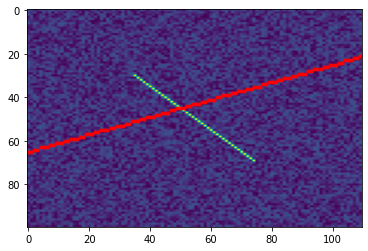

s = 0.01394601987751199
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = -0.29999999999999893
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [60 60 59 59 59 58 58 58 58 57 57 57 56 56 56 55 55 55 55 54 54 54 53 53
 53 52 52 52 52 51 51 51 50 50 50 49 49 49 49 48 48 48 47 47 47 46 46 46
 46 45 45 45 44 44 44 44 43 43 43 42 42 42 41 41 41 41 40 40 40 39 39 39
 38 38 38 38 37 37 37 36 36 36 35 35 35 35 34 34 34 33 33 33 32 32 32 32
 31 31 31 30 30 30 29 29 29 29 28 28 28 27]


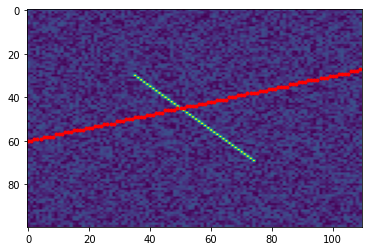

s = 0.005759055598250483
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = -0.19999999999999885
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [55 55 55 54 54 54 54 54 53 53 53 53 53 52 52 52 52 52 51 51 51 51 51 50
 50 50 50 50 49 49 49 49 49 48 48 48 48 48 47 47 47 47 47 46 46 46 46 46
 45 45 45 45 45 44 44 44 44 44 43 43 43 43 43 42 42 42 42 42 41 41 41 41
 41 40 40 40 40 40 39 39 39 39 39 38 38 38 38 38 37 37 37 37 37 36 36 36
 36 36 35 35 35 35 35 34 34 34 34 34 33 33]


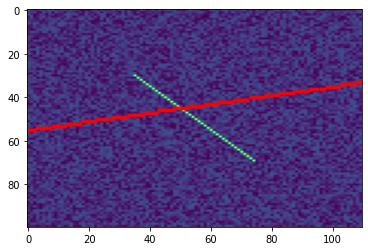

s = 0.013917123339381374
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = -0.09999999999999876
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [50 50 50 50 50 49 49 49 49 49 49 49 49 49 49 48 48 48 48 48 48 48 48 48
 48 47 47 47 47 47 47 47 47 47 47 46 46 46 46 46 46 46 46 46 46 45 45 45
 45 45 45 45 45 45 45 45 44 44 44 44 44 44 44 44 44 44 43 43 43 43 43 43
 43 43 43 43 42 42 42 42 42 42 42 42 42 42 41 41 41 41 41 41 41 41 41 41
 40 40 40 40 40 40 40 40 40 40 39 39 39 39]


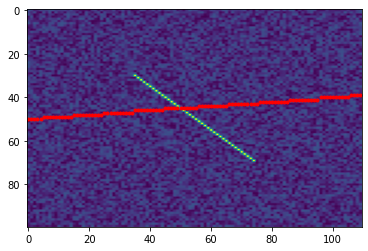

s = 0.010193592069586052
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = 1.3322676295501878e-15
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45
 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45
 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45
 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45 45
 45 45 45 45 45 45 45 45 45 45 45 45 45 45]


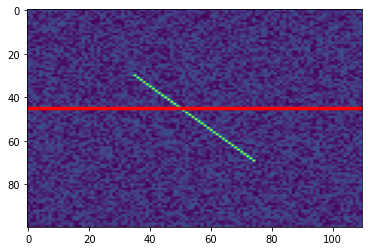

s = 0.0001008162748411646
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = 0.10000000000000142
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [40 40 40 40 40 40 41 41 41 41 41 41 41 41 41 41 42 42 42 42 42 42 42 42
 42 42 43 43 43 43 43 43 43 43 43 43 44 44 44 44 44 44 44 44 44 44 45 45
 45 45 45 45 45 45 45 46 46 46 46 46 46 46 46 46 46 47 47 47 47 47 47 47
 47 47 47 48 48 48 48 48 48 48 48 48 48 49 49 49 49 49 49 49 49 49 49 50
 50 50 50 50 50 50 50 50 50 51 51 51 51 51]


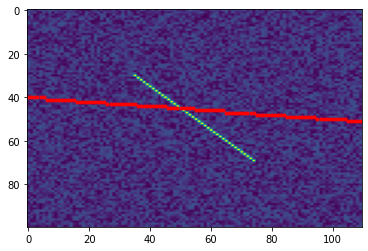

s = 0.04000166305806575
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = 0.2000000000000015
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [35 35 35 36 36 36 36 36 37 37 37 37 37 38 38 38 38 38 39 39 39 39 39 40
 40 40 40 40 41 41 41 41 41 42 42 42 42 42 43 43 43 43 43 44 44 44 44 44
 45 45 45 45 45 46 46 46 46 46 47 47 47 47 47 48 48 48 48 48 49 49 49 49
 49 50 50 50 50 50 51 51 51 51 51 52 52 52 52 52 53 53 53 53 53 54 54 54
 54 54 55 55 55 55 55 56 56 56 56 56 57 57]


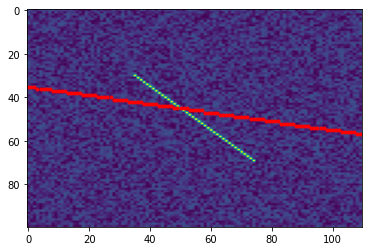

s = 0.0004885867602406196
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = 0.3000000000000016
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [30 30 31 31 31 31 32 32 32 33 33 33 34 34 34 34 35 35 35 36 36 36 37 37
 37 37 38 38 38 39 39 39 40 40 40 40 41 41 41 42 42 42 43 43 43 43 44 44
 44 45 45 45 46 46 46 47 47 47 47 48 48 48 49 49 49 50 50 50 50 51 51 51
 52 52 52 53 53 53 53 54 54 54 55 55 55 56 56 56 56 57 57 57 58 58 58 59
 59 59 59 60 60 60 61 61 61 62 62 62 62 63]


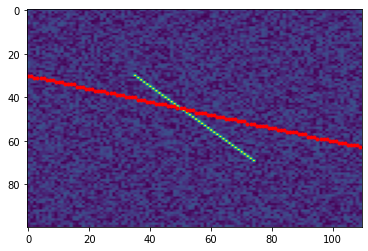

s = 0.0032197413767734956
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = 0.4000000000000017
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [25 25 26 26 27 27 27 28 28 29 29 29 30 30 31 31 31 32 32 33 33 33 34 34
 35 35 35 36 36 37 37 37 38 38 39 39 39 40 40 41 41 41 42 42 43 43 43 44
 44 45 45 45 46 46 47 47 47 48 48 49 49 49 50 50 51 51 51 52 52 53 53 53
 54 54 55 55 55 56 56 57 57 57 58 58 59 59 59 60 60 61 61 61 62 62 63 63
 63 64 64 65 65 65 66 66 67 67 67 68 68 69]


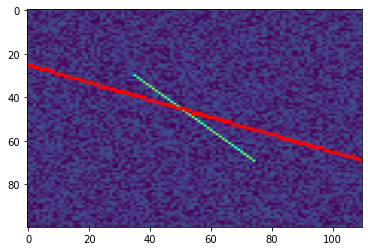

s = 0.005054700824500138
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = 0.5000000000000018
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [20 20 21 21 22 22 23 23 24 24 25 25 26 26 27 27 28 28 29 29 30 30 31 31
 32 32 33 33 34 34 35 35 36 36 37 37 38 38 39 39 40 40 41 41 42 42 43 43
 44 44 45 46 46 47 47 48 48 49 49 50 50 51 51 52 52 53 53 54 54 55 55 56
 56 57 57 58 58 59 59 60 60 61 61 62 62 63 63 64 64 65 65 66 66 67 67 68
 68 69 69 70 70 71 71 72 72 73 73 74 74 75]


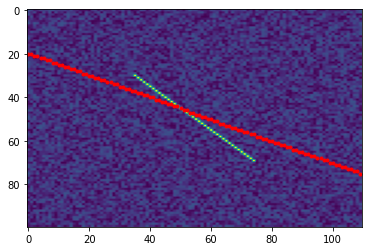

s = 0.00564142127024821
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = 0.6000000000000019
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [15 16 16 17 17 18 19 19 20 20 21 22 22 23 23 24 25 25 26 26 27 28 28 29
 29 30 31 31 32 32 33 34 34 35 35 36 37 37 38 38 39 40 40 41 41 42 43 43
 44 44 45 46 46 47 47 48 49 49 50 50 51 52 52 53 53 54 55 55 56 56 57 58
 58 59 59 60 61 61 62 62 63 64 64 65 65 66 67 67 68 68 69 70 70 71 71 72
 73 73 74 74 75 76 76 77 77 78 79 79 80 80]


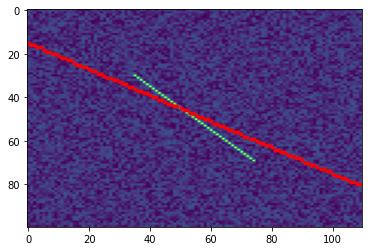

s = 0.03185639486524205
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = 0.700000000000002
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [10 11 11 12 13 13 14 15 16 16 17 18 18 19 20 20 21 22 23 23 24 25 25 26
 27 27 28 29 30 30 31 32 32 33 34 34 35 36 37 37 38 39 39 40 41 41 42 43
 44 44 45 46 46 47 48 49 49 50 51 51 52 53 53 54 55 56 56 57 58 58 59 60
 60 61 62 63 63 64 65 65 66 67 67 68 69 70 70 71 72 72 73 74 74 75 76 77
 77 78 79 79 80 81 81 82 83 84 84 85 86 86]


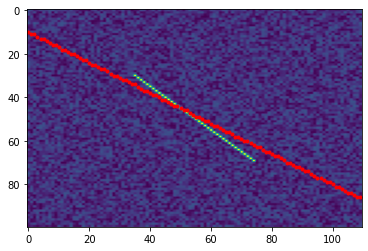

s = 0.029296170578765147
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = 0.800000000000002
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [ 5  6  7  7  8  9 10 11 11 12 13 14 15 15 16 17 18 19 19 20 21 22 23 23
 24 25 26 27 27 28 29 30 31 31 32 33 34 35 35 36 37 38 39 39 40 41 42 43
 43 44 45 46 47 47 48 49 50 51 51 52 53 54 55 55 56 57 58 59 59 60 61 62
 63 63 64 65 66 67 67 68 69 70 71 71 72 73 74 75 75 76 77 78 79 79 80 81
 82 83 83 84 85 86 87 87 88 89 90 91 91 92]


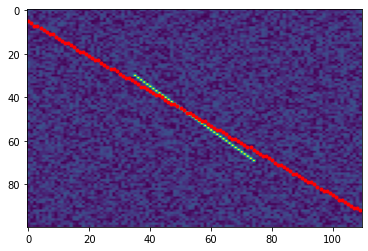

s = 0.028247936871367507
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = 0.9000000000000021
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [ 0  1  2  3  4  4  5  6  7  8  9 10 11 12 13 13 14 15 16 17 18 19 20 21
 22 22 23 24 25 26 27 28 29 30 31 31 32 33 34 35 36 37 38 39 40 40 41 42
 43 44 45 46 47 48 49 50 50 51 52 53 54 55 56 57 58 59 59 60 61 62 63 64
 65 66 67 68 68 69 70 71 72 73 74 75 76 77 77 78 79 80 81 82 83 84 85 86
 86 87 88 89 90 91 92 93 94 95 95 96 97 98]


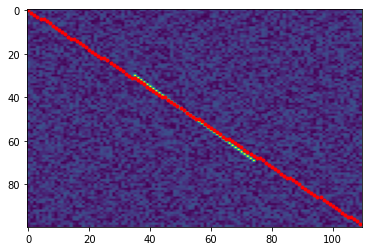

s = 0.08362132545922554
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = 1.0000000000000022
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [ -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7   8   9  10  11  12
  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30
  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48
  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66
  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 1

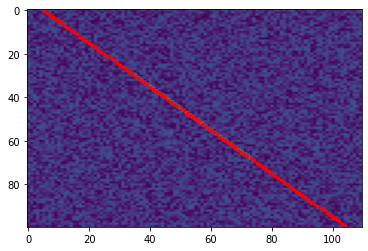

s = 0.352270482451095
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = 1.1000000000000023
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [-10  -9  -8  -7  -6  -5  -3  -2  -1   0   1   2   3   4   5   6   8   9
  10  11  12  13  14  15  16  17  19  20  21  22  23  24  25  26  27  28
  30  31  32  33  34  35  36  37  38  39  41  42  43  44  45  46  47  48
  49  51  52  53  54  55  56  57  58  59  60  62  63  64  65  66  67  68
  69  70  71  73  74  75  76  77  78  79  80  81  82  84  85  86  87  88
  89  90  91  92  93  95  96  97  98  99 100 101 102 103 104 106 107 108

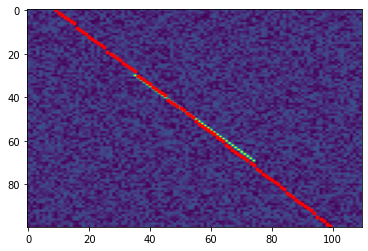

s = 0.0657969436804379
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = 1.2000000000000024
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [-15 -14 -13 -11 -10  -9  -8  -7  -5  -4  -3  -2  -1   1   2   3   4   5
   7   8   9  10  11  13  14  15  16  17  19  20  21  22  23  25  26  27
  28  29  31  32  33  34  35  37  38  39  40  41  43  44  45  46  47  49
  50  51  52  53  55  56  57  58  59  61  62  63  64  65  67  68  69  70
  71  73  74  75  76  77  79  80  81  82  83  85  86  87  88  89  91  92
  93  94  95  97  98  99 100 101 103 104 105 106 107 109 110 111 112 11

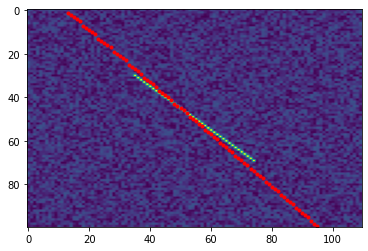

s = 0.04531932726141343
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = 1.3000000000000025
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [-20 -19 -17 -16 -15 -14 -12 -11 -10  -8  -7  -6  -4  -3  -2  -1   1   2
   3   5   6   7   9  10  11  12  14  15  16  18  19  20  22  23  24  25
  27  28  29  31  32  33  35  36  37  38  40  41  42  44  45  46  48  49
  50  52  53  54  55  57  58  59  61  62  63  65  66  67  68  70  71  72
  74  75  76  78  79  80  81  83  84  85  87  88  89  91  92  93  94  96
  97  98 100 101 102 104 105 106 107 109 110 111 113 114 115 117 118 1

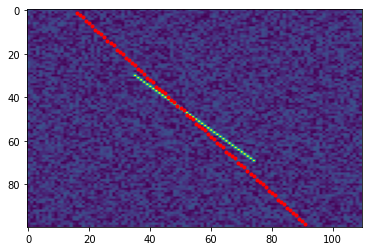

s = 0.052358147357427866
shape da matriz = (100, 110)
ponto imagem = [45,50]
p = 1.4000000000000026
x_grid = [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]
z_grid = [-25 -24 -22 -21 -19 -18 -17 -15 -14 -12 -11 -10  -8  -7  -5  -4  -3  -1
   0   2   3   4   6   7   9  10  11  13  14  16  17  18  20  21  23  24
  25  27  28  30  31  32  34  35  37  38  39  41  42  44  45  46  48  49
  51  52  53  55  56  58  59  60  62  63  65  66  67  69  70  72  73  74
  76  77  79  80  81  83  84  86  87  88  90  91  93  94  95  97  98 100
 101 102 104 105 107 108 109 111 112 114 115 116 118 119 121 122 123 

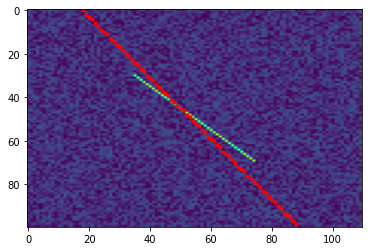

s = 0.02723090018877274
Smax = 0.352270482451095 pmax = 1.0000000000000022


In [147]:
pmin = -1.5
pmax = 1.5
dp = 0.1

s,pm = slant_local_p(dummy_matrix.T,x_ini,z_ini,dx,dz,x0,z0,pmin,pmax,dp)

print(f"Smax = {s}",f"pmax = {pm}")

In [155]:
def local_windowS(data1,xwin,zwin,x_ini,z_ini,dx,dz,x0,z0,pmin,pmax,dp):
    """
    Define a nova matriz a partir da janela definida para cálculo do slant_local_p()
    
    Entrada:
    data1: dado, conferir se precisa ser data1.T
    xwin: tamanho da janela em x (grid coord.)
    zwin: tamanho da janela em t (grid coord.)
    dx,dz: discretização do modelo data1
    dp: referente ao angulo (cos(theta)*dt/dx)
    tau:
    z_ini, x_ini: (grid coord.)
    
    Saída: 
    m_taumax e m_pmax, em que cada célula armazena os valores máximos de tau e p para aquele ponto no modelo
    """
    
    W=data1[z_ini:(z_ini+zwin),x_ini:(x_ini+xwin)] 
    s, pm = slant_local_p(W,x_ini,z_ini,dx,dz,x0,z0,pmin,pmax,dp)

    return s, pm

In [156]:
def local_window(data1,xwin,zwin,x_ini,z_ini,dx,dz,pmin,pmax,dp):
    """
    data1: dado, conferir se precisa ser data1.T
    xwin: tamanho da janela em x (grid coord.)
    zwin: tamanho da janela em t (grid coord.) 
    pmin,pmax,dp: referente ao angulo (cos(theta)*dt/dx)
    dx,dz: discretização do modelo data1
    
    Retorna duas matrizes com dimensões de data1: 
    m_taumax e m_pmax, em que cada célula armazena os valores máximos de tau e p para aquele ponto no modelo
    """
    p = np.arange(pmin,pmax,dp)
    
    [ntr1,nz1] = data1.T.shape
    
    p_max = np.zeros(data1.shape)
    s_max = np.zeros(data1.shape)

    
    for i in tqdm(range(0,nz1)): #eixo t
        for j in range(0,ntr1): #eixo x
            
            #Caso A
            if (i-np.int64(zwin/2))<=0:
                z_ini=0 #t_ini em grid
                zwinA=np.int64(zwin/2)+i

                #Caso A1
                if (j-np.int64(xwin/2))<=0:
                    #print("1")
                    x_ini=0
                    xwinA=np.int64(xwin/2)+j
                    smaxS,pmaxS = local_windowS(data1,xwinA,zwinA,x_ini,z_ini,dx,dz,j,i,pmin,pmax,dp)
                    p_max[i,j]=pmaxS
                    s_max[i,j]=smaxS
                    
                #Caso A2
                elif (j-np.int64(xwin/2))>0 and (j+np.int64(xwin/2))<ntr1:
                    #print("2")
                    x_ini=j-np.int64(xwin/2)
                    xwinA=xwin
                    smaxS,pmaxS = local_windowS(data1,xwinA,zwinA,x_ini,z_ini,dx,dz,j,i,pmin,pmax,dp)
                    p_max[i,j]=pmaxS
                    s_max[i,j]=smaxS
                
                # Caso A3
                elif (j+np.int64(xwin/2))>=ntr1:
                    #print("3")
                    x_ini=j-np.int64(xwin/2)
                    xwinA= xwin - (j + np.int64(xwin/2) - ntr1)
                    smaxS,pmaxS = local_windowS(data1,xwinA,zwinA,x_ini,z_ini,dx,dz,j,i,pmin,pmax,dp)
                    p_max[i,j]=pmaxS
                    s_max[i,j]=smaxS
            
            #Caso B
            elif (i+np.int64(zwin/2))>=nz1:
                z_ini=(i-np.int64(zwin/2))
                zwinA=zwin - (i + np.int64(zwin/2) - nz1)
                tau = np.arange(z_ini*dz, (z_ini+zwinA)*dz,dz)
                #Caso B1
                if (j-np.int64(xwin/2))<=0:
                    #print("1")
                    x_ini=0
                    xwinA=np.int64(xwin/2)+j
                    smaxS,pmaxS = local_windowS(data1,xwinA,zwinA,x_ini,z_ini,dx,dz,j,i,pmin,pmax,dp)
                    p_max[i,j]=pmaxS
                    s_max[i,j]=smaxS
                    
                #Caso B2
                elif (j-np.int64(xwin/2))>0 and (j+np.int64(xwin/2))<ntr1:
                    #print("2")
                    x_ini=j-np.int64(xwin/2)
                    xwinA= xwin
                    smaxS,pmaxS = local_windowS(data1,xwinA,zwinA,x_ini,z_ini,dx,dz,j,i,pmin,pmax,dp)
                    p_max[i,j]=pmaxS
                    s_max[i,j]=smaxS
                
                # Caso B3
                elif (j+np.int64(xwin/2))>=ntr1:
                    #print("3")
                    x_ini=j-np.int64(xwin/2)
                    xwinA= xwin - (j + np.int64(xwin/2) - ntr1)
                    smaxS,pmaxS = local_windowS(data1,xwinA,zwinA,x_ini,z_ini,dx,dz,j,i,pmin,pmax,dp)
                    p_max[i,j]=pmaxS
                    s_max[i,j]=smaxS
                    
            # Caso C 
            elif (i-np.int64(zwin/2))>0 and (i+np.int64(zwin/2))<nz1:
                z_ini=(i-np.int64(zwin/2))
                zwinA = zwin
                tau = np.arange(z_ini*dz, (z_ini+zwinA)*dz,dz)
                #Caso C1
                if (j-np.int64(xwin/2))<=0:
                    #print("1")
                    x_ini=0
                    xwinA=np.int64(xwin/2)+j
                    smaxS,pmaxS = local_windowS(data1,xwinA,zwinA,x_ini,z_ini,dx,dz,j,i,pmin,pmax,dp)
                    p_max[i,j]=pmaxS
                    s_max[i,j]=smaxS
                    
                #Caso C2
                elif (j-np.int64(xwin/2))>0 and (j+np.int64(xwin/2))<ntr1:
                    #print("2")
                    x_ini=j-np.int64(xwin/2)
                    xwinA= xwin
                    smaxS,pmaxS = local_windowS(data1,xwinA,zwinA,x_ini,z_ini,dx,dz,j,i,pmin,pmax,dp)
                    p_max[i,j]=pmaxS
                    s_max[i,j]=smaxS
               
                # Caso C3
                elif (j+np.int64(xwin/2))>=ntr1:
                    #print("3")
                    x_ini=j-np.int64(xwin/2)
                    xwinA= xwin - (j + np.int64(xwin/2) - ntr1)
                    smaxS,pmaxS = local_windowS(data1,xwinA,zwinA,x_ini,z_ini,dx,dz,j,i,pmin,pmax,dp)
                    p_max[i,j]=pmaxS
                    s_max[i,j]=smaxS
    
    return p_max,s_max

In [157]:
pmin = -1.5
pmax = 1.5
dp = 0.1
xwin=zwin=20
dx=dz=1

pm,sm = local_window(dummy_matrix.T,xwin,zwin,x_ini,z_ini,dx,dz,pmin,pmax,dp)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:50<00:00,  1.97it/s]


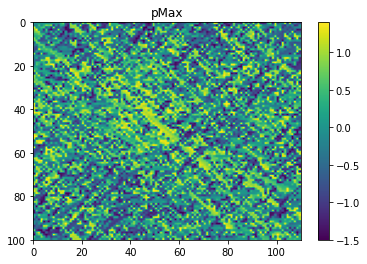

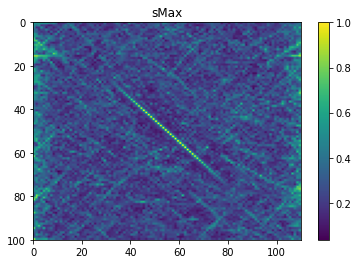

In [158]:
plt.imshow(pm, aspect="auto", extent=[0,nx*dx,nz*dz,0])
plt.title("pMax")
plt.colorbar()
plt.show()

plt.imshow(sm, aspect="auto", extent=[0,nx*dx,nz*dz,0])
plt.title("sMax")
plt.colorbar()
plt.show()

******

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:08<00:00,  1.46it/s]


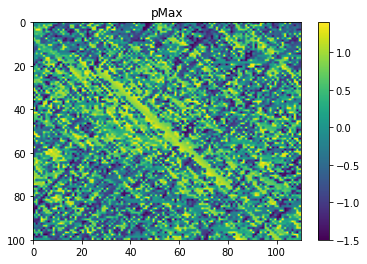

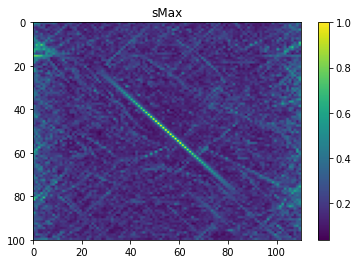

In [88]:
pmin = -1.5
pmax = 1.5
dp = 0.1
xwin=zwin=30
dx=dz=1

pm,sm = local_window(dummy_matrix.T,xwin,zwin,x_ini,z_ini,dx,dz,pmin,pmax,dp)

plt.imshow(pm, aspect="auto", extent=[0,nx*dx,nz*dz,0])
plt.title("pMax")
plt.colorbar()
plt.show()

plt.imshow(sm, aspect="auto", extent=[0,nx*dx,nz*dz,0])
plt.title("sMax")
plt.colorbar()
plt.show()

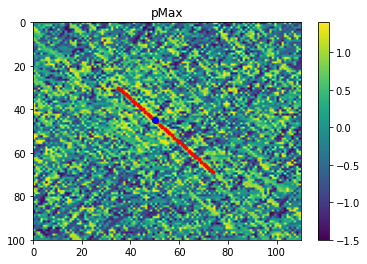

1.0000000000000022


In [161]:
xs = np.arange(35,75,1)
zs = np.arange(30,70,1)

plt.imshow(pm, aspect="auto", extent=[0,nx*dx,nz*dz,0])
plt.title("pMax")
plt.plot(xs,zs,"r.")
plt.plot(50,45,"bo")
plt.colorbar()
plt.show()

print(pm[45,50])

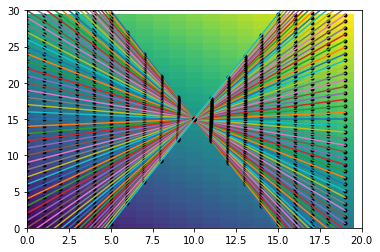

In [90]:
nx = 20
ny = 30
dummy_matrix = np.ones([ny,nx])

for i in range(dummy_matrix.shape[0]):
    for j in range(dummy_matrix.shape[1]):
        dummy_matrix[i,j] = (i+j)

#Coordenadas de um determinado ponto imagem
x0 = np.round(nx/2)
y0 = np.round(ny/2)

x = np.arange(nx)

#Variando a inclinação da reta
pini = -3
pfim = 3
dp = 0.1
p = np.arange(pini,pfim,dp)

plt.imshow(dummy_matrix,aspect="auto")
plt.plot(x0,y0,"ro")

for i in range(len(p)):
    y = p[i]*(x-x0) + y0
    
    for k in range(nx):
        if (x[k]<nx) and (y[k]>0 and y[k]<ny):
            plt.plot(x[k],y[k],"k.")

    plt.plot(x,y)

plt.xlim(0,nx)
plt.ylim(0,ny)
plt.show()

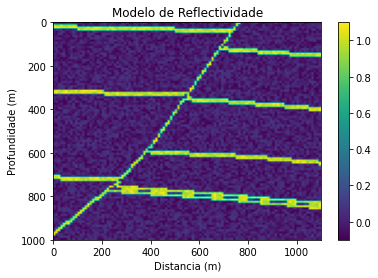

In [162]:
#Esse pedaço é só pra chamar o modelo de reflectividade


fr=40
nps=200
dt=.005 
rick=MigPreFuncoes.ricker(nps,fr,dt)

sx=10  #index position
sz=0  #index position
nx=110
nz=100
dt=.005
dx=10  #meters
dz=10  #meters
c=1992 #velocidade m/s

#Pensei em fazer uma função que calcula essas variáveis daqui pra baixo, deixar o codigo mais limpo...

tmax = np.sqrt((dx*nx)**2+(dz*nz)**2)*2/c
nt=int(np.ceil(tmax/dt+1))

nd2=nt+1; 
W=np.zeros(2*nt);
W[nt:nt+nps-1]=rick[0:nps-1];
x=np.arange(0,nx)
z=np.arange(0,nz)

velvector1 = np.loadtxt("Data/velvector") # Modelo de velocidade - 1 coluna em ASCII
vel = np.reshape(velvector1,[201,501]) # Coloca na dimensão correta
vel1 = vel[40:140,250:360] # Recorta um pequeno pedaço do modelovel[40:140,250:360]

c=vel1.min()

tmax = np.sqrt((dx*nx)**2+(dz*nz)**2)*2/c
nt=int(np.ceil(tmax/dt+1))

nd2=nt+1; 
W=np.zeros(2*nt);
W[nt:nt+nps-1]=rick[0:nps-1];
SW = 1./vel1 # Modelo de vagarosidade

SW = 1./vel[39:139,249:359]

dvel1=(np.abs(np.diff(vel1,axis=0)));
mx=np.max(dvel1.flatten('F'));  # Compute Refl Model for vel1;
dvel1=dvel1/mx;
dvel1=np.round(dvel1);
dvv=dvel1[nz-2,:]
R=np.append(dvel1,dvv[np.newaxis],axis=0);   # We lost a row in R by diff() so we add it back again

#Adicionando ruído no modelo
nn = np.random.rand(nz,nx)
R = R+(nn-0.5)*0.2

plt.imshow(R, extent=[0, nx*dx, nz*dz, 0], aspect='auto')
plt.title("Modelo de Reflectividade")
plt.xlabel("Distancia (m)")
plt.ylabel("Profundidade (m)")
plt.colorbar()
plt.show()

In [164]:
x0 = np.round(nx/2)
z0 = np.round(nz/2)
#x0 = 10          
#z0 = 15          
x_ini=z_ini=0

nx=110
nz=100
dt=.005
dx=10  #meters
dz=10  #meters

p = -2

s,x_grid,z_grid = slant_local(R,x_ini,z_ini,dx,dz,x0,z0,p)

print(s)

0.03569513960317872


In [165]:
pmin = -2
pmax = 2
dp = 0.1

s,pm = slant_local_p(R,x_ini,z_ini,dx,dz,x0,z0,pmin,pmax,dp)

print(f"Smax = {s}",f"pmax = {pm}")

Smax = 0.16772948465321816 pmax = -0.7999999999999989


100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [01:21<00:00,  1.23it/s]


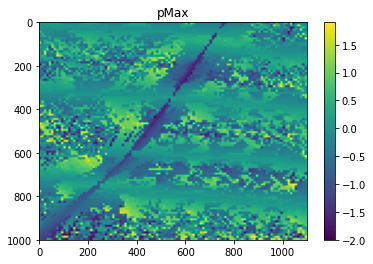

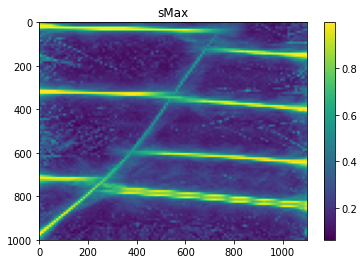

In [166]:
pmin = -2
pmax = 2
dp = 0.1
xwin=zwin=30
dx=dz=10

pm,sm = local_window(R,xwin,zwin,x_ini,z_ini,dx,dz,pmin,pmax,dp)

plt.imshow(pm, aspect="auto", extent=[0,nx*dx,nz*dz,0])
plt.title("pMax")
plt.colorbar()
plt.show()

plt.imshow(sm, aspect="auto", extent=[0,nx*dx,nz*dz,0])
plt.title("sMax")
plt.colorbar()
plt.show()

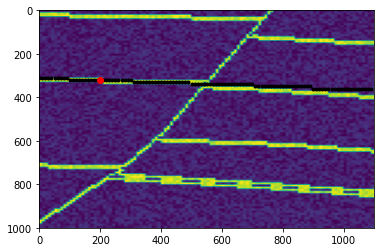

1e-16


In [37]:
nx=110
nz=100
dx=10  #meters
dz=10  #meters

#x0 = np.round(nx/2)*dx
#z0 = np.round(nz/2)*dz

x0 = 200
z0 = 320

p = 0.05

x_ini=z_ini=0

s,x_grid,z_grid = slant_local(R,x_ini,z_ini,dx,dz,x0,z0,p) #conferir a brincadeira do .T se não muda as contas

plt.imshow(R,aspect="auto",extent=[0,nx*dx,nz*dz,0])
plt.plot(x_grid*dx,z_grid*dz,"k.")
plt.plot(x0,z0,"ro")
#plt.xlim(0,nx)
#plt.ylim(ny,0)
plt.show()

print(s)

In [ ]:
#tenho que mudar a forma como estabelecemos o loop e a forma como calcula o slant. 

In [ ]:
def local_windowS(data1,xwin,zwin,dx,dz,p,tau,z_ini,x_ini):
    """
    data1: dado, conferir se precisa ser data1.T
    xwin: tamanho da janela em x (grid coord.)
    zwin: tamanho da janela em t (grid coord.) 
    pmin,pmax,dp: referente ao angulo (cos(theta)*dt/dx)
    dx,dz: discretização do modelo data1
    
    z_ini, x_ini (grid coord.)
    Retorna duas matrizes com dimensões de data1: 
    m_taumax e m_pmax, em que cada célula armazena os valores máximos de tau e p para aquele ponto no modelo
    """
    
    [ntr1,nz1] = data1.T.shape

    W=data1[z_ini:(z_ini+zwin),x_ini:(x_ini+xwin)] #atenção para não errar aqui

    s, x_grid, z_grid = slant(p,tau,W,dx,dz,z_ini,x_ini)

    return s

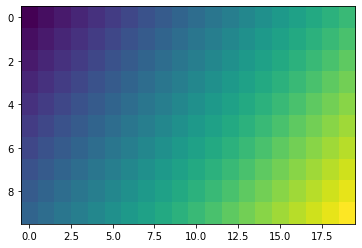

In [28]:
dummy_matrix = np.ones([20,10])

for i in range(dummy_matrix.shape[0]):
    for j in range(dummy_matrix.shape[1]):
        dummy_matrix[i,j] = (i+j)
    
plt.imshow(dummy_matrix.T,aspect="auto")
plt.show()

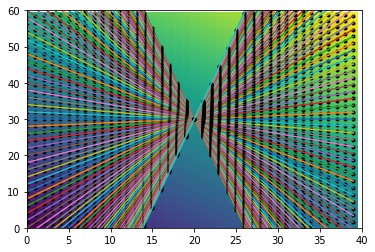

In [83]:
nx = 40
ny = 60
dummy_matrix = np.ones([ny,nx])

for i in range(dummy_matrix.shape[0]):
    for j in range(dummy_matrix.shape[1]):
        dummy_matrix[i,j] = (i+j)

#Coordenadas de um determinado ponto imagem
x0 = np.round(nx/2)
y0 = np.round(ny/2)

x = np.arange(nx)

#Variando a inclinação da reta
pini = -5
pfim = 5
dp = 0.1
p = np.arange(pini,pfim,dp)

plt.imshow(dummy_matrix,aspect="auto")
plt.plot(x0,y0,"ro")

for i in range(len(p)):
    y = p[i]*(x-x0) + y0
    
    for k in range(nx):
        if (x[k]<nx) and (y[k]>0 and y[k]<ny):
            plt.plot(x[k],y[k],"k.")

    plt.plot(x,y)

plt.xlim(0,nx)
plt.ylim(0,ny)
plt.show()

In [ ]:
def local_window(data1,xwin,zwin,dx,dz,pmin,pmax,dp):
    """
    data1: dado, conferir se precisa ser data1.T
    xwin: tamanho da janela em x (grid coord.)
    zwin: tamanho da janela em t (grid coord.) 
    pmin,pmax,dp: referente ao angulo (cos(theta)*dt/dx)
    dx,dz: discretização do modelo data1
    
    Retorna duas matrizes com dimensões de data1: 
    m_taumax e m_pmax, em que cada célula armazena os valores máximos de tau e p para aquele ponto no modelo
    """
    
    #dp=0.1
    #pmin=-3
    #pmax=3
    p = np.arange(pmin,pmax,dp)
    
    [ntr1,nz1] = data1.T.shape
    
    m_taumax = np.zeros(data1.shape)
    m_pmax = np.zeros(data1.shape)
    s_max = np.zeros(data1.shape)

    
    for i in tqdm(range(0,nz1)): #eixo t
        for j in range(0,ntr1): #eixo x
            
            #Caso A
            if (i-np.int64(zwin/2))<=0:
                z_ini=0 #t_ini em grid
                zwinA=np.int64(zwin/2)+i
                tau = np.arange(z_ini*dz, (z_ini+zwinA)*dz,dz)
                #Caso A1
                if (j-np.int64(xwin/2))<=0:
                    #print("1")
                    x_ini=0
                    xwinA=np.int64(xwin/2)+j
                    smax = 0
                    pmaxS = 0
                    taumaxS = 0
                    for ip in p:
                        for itau in tau:
                            s = local_windowS(data1,xwinA,zwinA,dx,dz,ip,itau,z_ini,x_ini)
                            if s>smax:
                                smax = s
                                pmaxS = ip
                                taumaxS = itau
                    
                    m_taumax[i,j]=taumaxS
                    m_pmax[i,j]=pmaxS
                    s_max[i,j]=smax
                    
                #Caso A2
                elif (j-np.int64(xwin/2))>0 and (j+np.int64(xwin/2))<ntr1:
                    #print("2")
                    x_ini=j-np.int64(xwin/2)
                    xwinA= xwin
                    smax = 0
                    pmaxS = 0
                    taumaxS = 0
                    for ip in p:
                        for itau in tau:
                            s = local_windowS(data1,xwinA,zwinA,dx,dz,ip,itau,z_ini,x_ini)
                            if s>smax:
                                smax = s
                                pmaxS = ip
                                taumaxS = itau
                    
                    m_taumax[i,j]=taumaxS
                    m_pmax[i,j]=pmaxS
                    s_max[i,j]=smax
                
                # Caso A3
                elif (j+np.int64(xwin/2))>=ntr1:
                    #print("3")
                    x_ini=j-np.int64(xwin/2)
                    xwinA= xwin - (j + np.int64(xwin/2) - ntr1)
                    smax = 0
                    pmaxS = 0
                    taumaxS = 0
                    for ip in p:
                        for itau in tau:
                            s = local_windowS(data1,xwinA,zwinA,dx,dz,ip,itau,z_ini,x_ini)
                            if s>smax:
                                smax = s
                                pmaxS = ip
                                taumaxS = itau
                    
                    m_taumax[i,j]=taumaxS
                    m_pmax[i,j]=pmaxS
                    s_max[i,j]=smax
            
            #Caso B
            elif (i+np.int64(zwin/2))>=nz1:
                z_ini=(i-np.int64(zwin/2))
                zwinA=zwin - (i + np.int64(zwin/2) - nz1)
                tau = np.arange(z_ini*dz, (z_ini+zwinA)*dz,dz)
                #Caso B1
                if (j-np.int64(xwin/2))<=0:
                    #print("1")
                    x_ini=0
                    xwinA=np.int64(xwin/2)+j
                    smax = 0
                    pmaxS = 0
                    taumaxS = 0
                    for ip in p:
                        for itau in tau:
                            s = local_windowS(data1,xwinA,zwinA,dx,dz,ip,itau,z_ini,x_ini)
                            if s>smax:
                                smax = s
                                pmaxS = ip
                                taumaxS = itau
                    
                    m_taumax[i,j]=taumaxS
                    m_pmax[i,j]=pmaxS
                    s_max[i,j]=smax
                    
                #Caso B2
                elif (j-np.int64(xwin/2))>0 and (j+np.int64(xwin/2))<ntr1:
                    #print("2")
                    x_ini=j-np.int64(xwin/2)
                    xwinA= xwin
                    smax = 0
                    pmaxS = 0
                    taumaxS = 0
                    for ip in p:
                        for itau in tau:
                            s = local_windowS(data1,xwinA,zwinA,dx,dz,ip,itau,z_ini,x_ini)
                            if s>smax:
                                smax = s
                                pmaxS = ip
                                taumaxS = itau
                    
                    m_taumax[i,j]=taumaxS
                    m_pmax[i,j]=pmaxS
                    s_max[i,j]=smax
                
                # Caso B3
                elif (j+np.int64(xwin/2))>=ntr1:
                    #print("3")
                    x_ini=j-np.int64(xwin/2)
                    xwinA= xwin - (j + np.int64(xwin/2) - ntr1)
                    smax = 0
                    pmaxS = 0
                    taumaxS = 0
                    for ip in p:
                        for itau in tau:
                            s = local_windowS(data1,xwinA,zwinA,dx,dz,ip,itau,z_ini,x_ini)
                            if s>smax:
                                smax = s
                                pmaxS = ip
                                taumaxS = itau
                    
                    m_taumax[i,j]=taumaxS
                    m_pmax[i,j]=pmaxS
                    s_max[i,j]=smax
            # Caso C 
            elif (i-np.int64(zwin/2))>0 and (i+np.int64(zwin/2))<nz1:
                z_ini=(i-np.int64(zwin/2))
                zwinA = zwin
                tau = np.arange(z_ini*dz, (z_ini+zwinA)*dz,dz)
                #Caso C1
                if (j-np.int64(xwin/2))<=0:
                    #print("1")
                    x_ini=0
                    xwinA=np.int64(xwin/2)+j
                    smax = 0
                    pmaxS = 0
                    taumaxS = 0
                    for ip in p:
                        for itau in tau:
                            s = local_windowS(data1,xwinA,zwinA,dx,dz,ip,itau,z_ini,x_ini)
                            if s>smax:
                                smax = s
                                pmaxS = ip
                                taumaxS = itau
                    
                    m_taumax[i,j]=taumaxS
                    m_pmax[i,j]=pmaxS
                    s_max[i,j]=smax
                    
                #Caso C2
                elif (j-np.int64(xwin/2))>0 and (j+np.int64(xwin/2))<ntr1:
                    #print("2")
                    x_ini=j-np.int64(xwin/2)
                    xwinA= xwin
                    smax = 0
                    pmaxS = 0
                    taumaxS = 0
                    for ip in p:
                        for itau in tau:
                            s = local_windowS(data1,xwinA,zwinA,dx,dz,ip,itau,z_ini,x_ini)
                            if s>smax:
                                smax = s
                                pmaxS = ip
                                taumaxS = itau
                    
                    m_taumax[i,j]=taumaxS
                    m_pmax[i,j]=pmaxS
                    s_max[i,j]=smax
               
                # Caso C3
                elif (j+np.int64(xwin/2))>=ntr1:
                    #print("3")
                    x_ini=j-np.int64(xwin/2)
                    xwinA= xwin - (j + np.int64(xwin/2) - ntr1)
                    smax = 0
                    pmaxS = 0
                    taumaxS = 0
                    for ip in p:
                        for itau in tau:
                            s = local_windowS(data1,xwinA,zwinA,dx,dz,ip,itau,z_ini,x_ini)
                            if s>smax:
                                smax = s
                                pmaxS = ip
                                taumaxS = itau
                    
                    m_taumax[i,j]=taumaxS
                    m_pmax[i,j]=pmaxS
                    s_max[i,j]=smax
    
    return m_taumax,m_pmax,s_max

In [67]:
#Slant:

0.2547591659547788


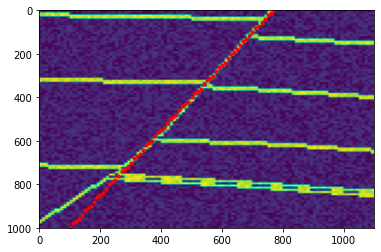

In [5]:
#p=0.002
p=-1.5
tau=1150
data1=R
dx=10
dz=10
z_ini=0
x_ini=0

s,x,z = SlantStack.slant(p,tau,data1,dx,dz,z_ini,x_ini)

print(s)

plt.imshow(R, extent=[0, nx*dx,nz*dz, 0], aspect="auto")
plt.plot(x*dx,z*dz,'.r')
plt.ylim([nz*dz,0])
plt.show()


In [69]:
#SlantStack:

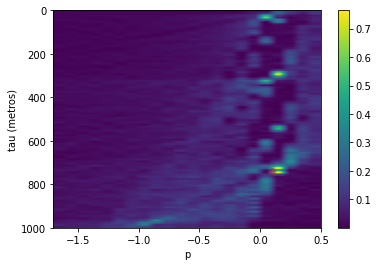

In [72]:
dx=10
dt=10
taumin=0
taumax=nz*dz
dtau=dz
data1=R
t_ini=0
x_ini=0
pmin=-1.7
pmax=0.5
dp=0.1

S, pmaxS, taumaxS, Smax, ip, itau = SlantStack.slant_stack(pmin,pmax,dp,taumin,taumax,dtau,data1,dx,dt,t_ini,x_ini)

plt.imshow(S,extent=[pmin,pmax,nz*dz,0],aspect="auto")
plt.colorbar()
plt.xlabel('p')
plt.ylabel('tau (metros)')

plt.plot(pmaxS,taumaxS,"or",alpha=.3)

plt.show()

In [71]:
#LocalSlantStack:

In [77]:
xwin=zwin=20 #pontos do grid
pmin=-1.7
pmax=0.5
dp=0.1

m_taumax,m_pmax,s_max = SlantStack.local_window(R,xwin,zwin,dx,dz,
                                               pmin,pmax,dp) #fazer a mesma coisa aqui para o path 

with open("Data/CSG/velvector_dipfield", "wb") as f: #que aí já economizo nessa parte 
    np.save(f, m_pmax)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [09:15<00:00,  5.56s/it]


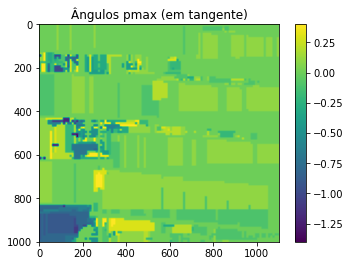

In [78]:
with open("Data/CSG/velvector_dipfield", "rb") as f:
    tst = np.load(f)

plt.imshow(tst,extent=[0, nx*dx, nz*dz, 0])
plt.title("Ângulos pmax (em tangente)")
plt.colorbar()
plt.show()

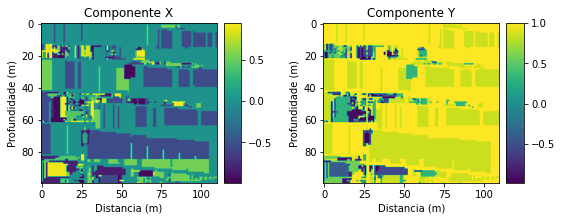

In [88]:
m_theta = np.degrees(np.arctan(tst))

X = np.sin(m_theta)
Y = np.cos(m_theta)

from mpl_toolkits.axes_grid1 import make_axes_locatable

fig = plt.figure(figsize=(8, 8))

ax1 = fig.add_subplot(121)
ax1.set_title("Componente X")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")
im1 = ax1.imshow(X)
divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='10%', pad=0.1)
fig.colorbar(im1, cax=cax, orientation='vertical')


ax2 = fig.add_subplot(122)
ax2.set_title("Componente Y")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")
im2 = ax2.imshow(Y)
divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='10%', pad=0.1)
fig.colorbar(im2, cax=cax, orientation='vertical')

plt.tight_layout()
plt.show()

In [91]:
files = []

nsx=nx
dsx=5

for i in range(0,nsx,dsx):
    filename = "Data/CSG/velvector_gather_shot{}".format(i)
    with open(filename, 'rb') as file:
        (gather) = np.load(file)
        files.append(gather)

In [94]:
with open("Data/CSG/raiosVelvector.npy", 'rb') as f:
    TTh = np.load(f)
    
timer=np.round(TTh/dt)+1

In [101]:
win=20*dt #(metade) janela em tempo em cada etapa
dwin=dt
app=20 # abertura em traços
epsilon=1.0  # frequency dependent
dt=.005

shot = 60
filename = 'Data/CSG/velvector_gather_shot{}'.format(int(shot))

with open(filename, 'rb') as file:
    gather1t = np.load(file)

print(nt)
gather1=gather1t[0:nt,:]
isx=shot

300


100%|████████████████████████████████████████████████████████████████████████████████| 110/110 [00:08<00:00, 13.50it/s]


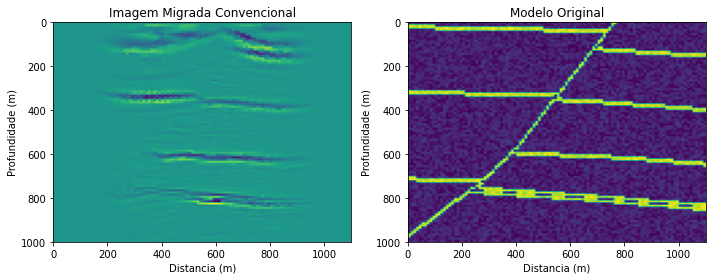

In [102]:
mig_winapp = MigPreFuncoes.migvsp_winapp(gather1,isx,dx,dz,dt,
                                         win,dwin,app,TTh,X,Y, epsilon)

#mig_winapp = MigPreFuncoes.migvsp(timer,isx,dt,gather1)


fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.imshow(mig_winapp, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada Convencional")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(R, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Modelo Original")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

100%|████████████████████████████████████████████████████████████████████████████████| 110/110 [00:08<00:00, 13.01it/s]


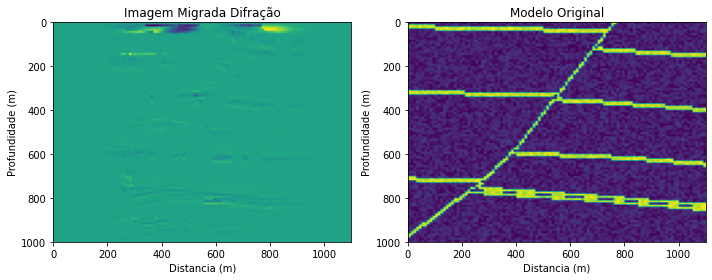

In [103]:
mig_diff = MigPreFuncoes.migvsp_winapp_diff(gather1,isx,dx,dz,dt,win,dwin,app,TTh,X,Y,epsilon)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.imshow(mig_diff, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada Difração")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(R, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Modelo Original")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

22it [02:56,  8.04s/it]


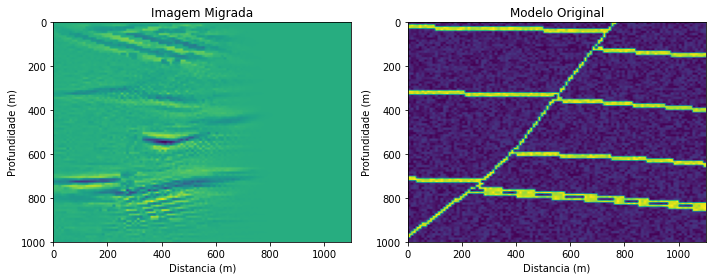

In [105]:
#Stack

mig_stack = MigPreFuncoes.migstack_winapp(files,isx,dx,dz,dt,win,dwin,app,TTh,X,Y,epsilon)

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(10,4))

ax1.imshow(mig_stack, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax1.set_title("Imagem Migrada")
ax1.set_xlabel("Distancia (m)")
ax1.set_ylabel("Profundidade (m)")

ax2.imshow(R, aspect="auto",extent=[0,dx*nx,dz*nz,0])
ax2.set_title("Modelo Original")
ax2.set_xlabel("Distancia (m)")
ax2.set_ylabel("Profundidade (m)")

plt.tight_layout()
plt.show()

In [4]:
def slant_original(p,tau,data1,dx=1,dz=1,x_ini=0,z_ini=0):
    """
    Calcula a semblance da reta dada definida por (tau + p*x)
    p - tangente de theta (prof./dist.)
    tau - profunidade (m)
    data1 - dado [s,m]
    dz -
    x_ini - [coordenada do grid]
    z_ini -
    Saída:
    s -
    x_grid -
    z_grid -
    
    """
    
    ##Teste
    #
    dx=1
    dz=1
    #
    ##Fim do teste
    
    #x = np.arange(x_ini*dx,(x_ini+ntr1)*dx,dx)
    #z = tau + p*x
    #z_grid = np.int64(np.round(z/dz)-z_ini)
    #x_grid = np.int64((np.round(x/dx))-x_ini)
    
    [nz1,ntr1]=data1.shape
    dataC = data1.copy()
    cz2= nz1/2
    cx2= ntr1/2
    x = np.arange(x_ini*dx,(x_ini+ntr1)*dx,dx)
    z = tau + p*(x-cx2*dx)
    z_grid = np.int64(np.round(z/dz)-z_ini)
    x_grid = np.int64(np.round(x/dx)-x_ini)
    
    s_n = 0
    s_d = 0
    
    for k in range(ntr1):
        if (z_grid[k]<nz1) & (z_grid[k]>=0):
            s_n += dataC[z_grid[k],x_grid[k]]
            s_d += dataC[z_grid[k],x_grid[k]]**2
    
    if s_d == 0:
        #print('sd = 0, sn =',s_n)
        s=1e-16 #avoid nan's
    
    else:
        s = s_n**2/ntr1/s_d

        
    return s,x_grid,z_grid

In [5]:
def slant_code(p,tau,data1,dx,dz,z_ini,x_ini):
    # Retorna a semblance da reta dada por p, tau
    #p = tangente de theta (prof./dist.)
    #tau = tempo (s) (ou prof. em m)
    # data1 = dado [s,m]
    # dt [s]
    # x_ini [coordenada do grid]
    
    ##Teste
    #
    #dx=1
    #dz=1
    #dt=1
    #
    ##Fim do teste
    
    [nz1,ntr1]=data1.shape
    dataC = data1.copy()
    x = np.arange(x_ini*dx,(x_ini+ntr1)*dx,dx)
    z = tau + p*x
    z_grid = np.int64(np.round(z/dz)-z_ini)
    x_grid = np.int64((np.round(x/dx))-x_ini)
    s_n = 0
    s_d = 0
    
    for k in range(ntr1):
        
        if (z_grid[k]<nz1) & (z_grid[k]>=0):
            
            s_n += dataC[z_grid[k],x_grid[k]]
            s_d += dataC[z_grid[k],x_grid[k]]**2

    
    if s_d == 0:
        s=1e-16 #avoid nan's
    
    else:
        s = s_n**2/ntr1/s_d

        
    return s, x_grid, z_grid

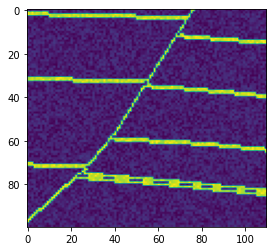

In [13]:
plt.imshow(R)

In [31]:
dx=dz=10
p = 0.02
tau = 20

x = np.arange(x_ini*dx,(x_ini+ntr1)*dx,dx)
print(x)

z = tau + p*x
print("\nz=",z)

#O valor de z é igual, independentemente de x

z_grid = np.int64(np.round(z/dz)-z_ini)
x_grid = np.int64((np.round(x/dx))-x_ini)

print("\n\n",x_grid,"\n\n",z_grid)

[   0   10   20   30   40   50   60   70   80   90  100  110  120  130
  140  150  160  170  180  190  200  210  220  230  240  250  260  270
  280  290  300  310  320  330  340  350  360  370  380  390  400  410
  420  430  440  450  460  470  480  490  500  510  520  530  540  550
  560  570  580  590  600  610  620  630  640  650  660  670  680  690
  700  710  720  730  740  750  760  770  780  790  800  810  820  830
  840  850  860  870  880  890  900  910  920  930  940  950  960  970
  980  990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090]

z= [20.  20.2 20.4 20.6 20.8 21.  21.2 21.4 21.6 21.8 22.  22.2 22.4 22.6
 22.8 23.  23.2 23.4 23.6 23.8 24.  24.2 24.4 24.6 24.8 25.  25.2 25.4
 25.6 25.8 26.  26.2 26.4 26.6 26.8 27.  27.2 27.4 27.6 27.8 28.  28.2
 28.4 28.6 28.8 29.  29.2 29.4 29.6 29.8 30.  30.2 30.4 30.6 30.8 31.
 31.2 31.4 31.6 31.8 32.  32.2 32.4 32.6 32.8 33.  33.2 33.4 33.6 33.8
 34.  34.2 34.4 34.6 34.8 35.  35.2 35.4 35.6 35.8 36.  36.2 36.4 36.6
 36.8 37.  3

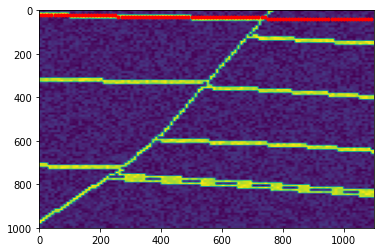

In [32]:
plt.imshow(R, extent=[0, nx*dx,nz*dz, 0], aspect="auto")
plt.plot(x_grid*dx,z_grid*dz,'.r')
plt.show()

0.48721470979098935 [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109] [32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32 32
 32 32 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33
 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33 33
 33 33 33 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34 34
 34 34 34 34 34 34 34 34 34 34 34 34 34 34]


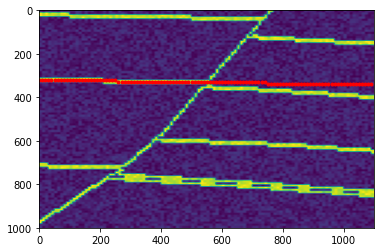

In [51]:
def slant_code(p,tau,data1,dx,dz,z_ini,x_ini):
    # Retorna a semblance da reta dada por p, tau
    #p = tangente de theta (prof./dist.)
    #tau = tempo (s) (ou prof. em m)
    # data1 = dado [s,m]
    # dt [s]
    # x_ini [coordenada do grid]
    
    ##Teste
    #
    #dx=1
    #dz=1
    #dt=1
    #
    ##Fim do teste
    
    [nz1,ntr1]=data1.shape
    dataC = data1.copy()
    x = np.arange(x_ini*dx,(x_ini+ntr1)*dx,dx)
    z = tau + p*x
    z_grid = np.int64(np.round(z/dz)-z_ini)
    x_grid = np.int64((np.round(x/dx))-x_ini)
    s_n = 0
    s_d = 0
    
    for k in range(ntr1):
        
        if (z_grid[k]<nz1) & (z_grid[k]>=0):
            
            s_n += dataC[z_grid[k],x_grid[k]]
            s_d += dataC[z_grid[k],x_grid[k]]**2

    
    if s_d == 0:
        s=1e-16 #avoid nan's
    
    else:
        s = s_n**2/ntr1/s_d

        
    return s, x_grid, z_grid

p=0.02
tau=320 #profundidade
data1=R
dx=dz=10
z_ini=x_ini=0

s,x,z = slant_code(p, tau, data1, dx, dz, z_ini, x_ini)

print(s,x,z)

plt.imshow(R, extent=[0, nx*dx,nz*dz, 0], aspect="auto")
plt.plot(x*dx,z*dz,'.r')
plt.show()


Implementado com dx=dz=10

[   0   10   20   30   40   50   60   70   80   90  100  110  120  130
  140  150  160  170  180  190  200  210  220  230  240  250  260  270
  280  290  300  310  320  330  340  350  360  370  380  390  400  410
  420  430  440  450  460  470  480  490  500  510  520  530  540  550
  560  570  580  590  600  610  620  630  640  650  660  670  680  690
  700  710  720  730  740  750  760  770  780  790  800  810  820  830
  840  850  860  870  880  890  900  910  920  930  940  950  960  970
  980  990 1000 1010 1020 1030 1040 1050 1060 1070 1080 1090]

[ 3.   3.2  3.4  3.6  3.8  4.   4.2  4.4  4.6  4.8  5.   5.2  5.4  5.6
  5.8  6.   6.2  6.4  6.6  6.8  7.   7.2  7.4  7.6  7.8  8.   8.2  8.4
  8.6  8.8  9.   9.2  9.4  9.6  9.8 10.  10.2 10.4 10.6 10.8 11.  11.2
 11.4 11.6 11.8 12.  12.2 12.4 12.6 12.8 13.  13.2 13.4 13.6 13.8 14.
 14.2 14.4 14.6 14.8 15.  15.2 15.4 15.6 15.8 16.  16.2 16.4 16.6 16.8
 17.  17.2 17.4 17.6 17.8 18.  18.2 18.4 18.6 18.8 19.  19

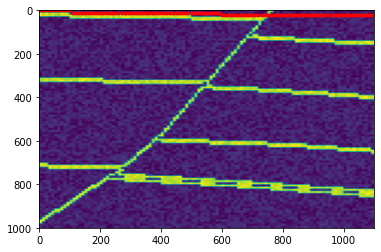


Original com dx=dz=10

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1]


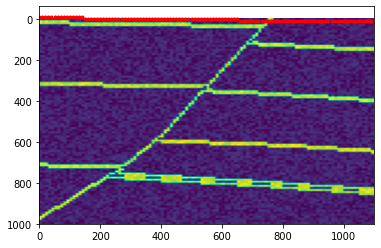


Original com dx=dz=1

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109]

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]


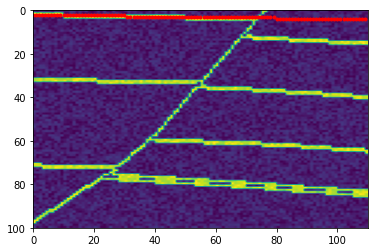

In [28]:
#########################################
print("\nImplementado com dx=dz=10\n")
#########################################

dx=dz=10
p = 0.02
tau = 3
z_ini = x_ini = 0
[nz1,ntr1]=R.shape

x = np.arange(x_ini*dx,(x_ini+ntr1)*dx,dx)
z = tau + p*x

print(x)
print("")
print(z)
print("")

z_grid = np.int64(np.round(z/dz)-z_ini)
x_grid = np.int64((np.round(x/dx))-x_ini)

print(x_grid)
print("")
print(z_grid)

plt.imshow(R, extent=[0, nx*dx,nz*dz, 0], aspect="auto")
plt.plot(x_grid*dx,z_grid*dz,'.r')
plt.show()

#########################################
print("\nOriginal com dx=dz=10\n")
#########################################

ct2= nz1/2
cx2= ntr1/2
x = np.arange(0,ntr1*dx,dx)
z = tau + p*(x-cx2*dx)

#print(x)
#print("")
#print(z)

z_grid = np.int64(np.round(z/dz))
x_grid = np.int64(np.round(x/dx))

print(x_grid)
print("")
print(z_grid)

plt.imshow(R, extent=[0, nx*dx,nz*dz, 0], aspect="auto")
plt.plot(x_grid*dx,z_grid*dz,'.r')
plt.show()

#########################################
print("\nOriginal com dx=dz=1\n")
#########################################

dx=dz=1

ct2= nz1/2
cx2= ntr1/2
x = np.arange(0,ntr1*dx,dx)
z = tau + p*(x-cx2*dx)

#print(x)
#print("")
#print(z)

z_grid = np.int64(np.round(z/dz))
x_grid = np.int64(np.round(x/dx))

print(x_grid)
print("")
print(z_grid)

plt.imshow(R, extent=[0, nx*dx,nz*dz, 0], aspect="auto")
plt.plot(x_grid*dx,z_grid*dz,'.r')
plt.show()

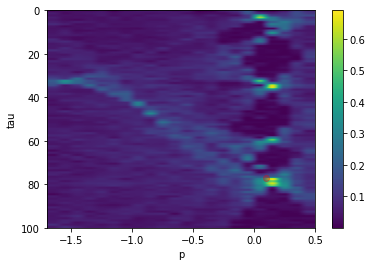

In [8]:
# Detectando as inclinações presentes no modelo

pmin=-2
pmax=0.5
#dp=0.001


pmin=-1.7
pmax=0.5
dp=0.1


S,pmaxS,taumaxS,smax,ip,itau = SlantStack.slant_stack(pmin,pmax,dp,0,nz*1,1,R,1,1,0,0)

#Ficou um pouco deslocado...

plt.imshow(S,extent=[pmin,pmax,nz*dz,0],aspect="auto")
plt.colorbar()
plt.xlabel('p')
plt.ylabel('tau')

plt.plot(pmaxS,taumaxS,"or",alpha=.3)

plt.show()

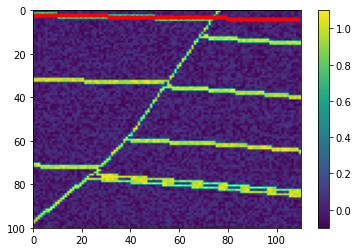

In [9]:
p = 0.02
tau = 3
z_ini = x_ini = 0

s0,x0,t0=slant_original(0.02,3,R,1,1) 
#s1,x1,t1 = SlantStack.slant(0.02,3,R,1,1,0,0)
s1,x1,t1 = SlantStack.slant_original(p,tau,R,dx,dz,z_ini,x_ini)

#Problema está nesse último argumento

plt.imshow(R, extent=[0, nx*dx,nz*dz, 0], aspect="auto")
plt.plot(x0*dx,t0*dz,'.r')
plt.plot(x1*dx,t1*dz,'.r')
plt.colorbar()

In [2]:
x = np.ones([11,11])
y = MigPreFuncoes.phase_shift(x)

In [3]:
y.shape

(11, 11)

In [4]:
t = np.linspace(0,np.pi,91)
s = np.sin(2*t)

In [5]:
S = rfft(s)

print(S.shape)

(46,)


In [6]:
s2 = irfft(S)
print(s2.shape)

(90,)


TTh.shape=(240, 120, 240)


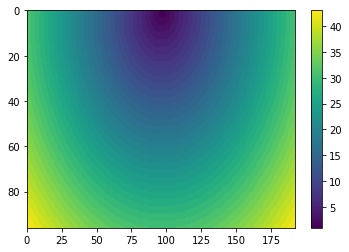

TSX.shape=(120, 240)


In [8]:
dx=0.8 #(m) Discretização em X
dz=0.8 #(m) Discretização em Y
#dt=0.8 #(s)
nt=nz=120 #Tamanho do Grid em 
ntr=nx=240
c=250 #m/s

with open('Data/time_table_barra.npy', 'rb') as f:
    TTh = np.load(f)

print(f"TTh.shape={TTh.shape}")

dt=0.004

TSX = (TTh[120,:,:]/dt+1).astype(int)  # Traveltime  (indexes)
plt.imshow(TSX,extent=[0, ntr*dx, nz*dz, 0], aspect='auto')
plt.colorbar()
plt.show()

timer=np.round(TTh/dt)+1

print(f"TSX.shape={TSX.shape}")

In [253]:
def peso(TTh,dt,igx,isx):
    """
    Calcula a função peso w(s,x,r)
    Entrada:
    TTh - tabela do tempo de trânsito calculada com a função raymodel3
    dt - discretização do tempo (s)
    X - componente X da normal do modelo; X = np.sin(m_theta); X.shape = [nz,nx]
    Y - componente Y da normal do modelo; Y = np.cos(m_theta); Y.shape = [nz,nx]
    igx - posição do receptor 
    isx - posição da fonte
    Saída:
    w - função peso (w.shape=[nz,nx])
    """
    
    #timer=np.round(TTh/dt)+1

    timer = TTh
    gH = np.gradient(timer, axis=2) #gradiente horizontal  #diferença entre colunas (do modelo de velocidade)
    gV = np.gradient(timer, axis=1) #gradiente vertical    #diferença entre linhas

    
    prV = gV[igx,:,:] #gV[igx,iz,ix]
    prH = gH[igx,:,:] 

    psV = gV[isx,:,:] 
    psH = gH[isx,:,:] 

    pH = psH + prH
    pV = psV + prV
    
    return psV,psH,prV,prH


In [254]:
psV,psH,prV,prH = peso(TTh,dt,60,60)

x = np.linspace(0, ntr*dx,ntr)
z = np.linspace(0, nz*dz,nz)
[X,Z] = np.meshgrid(x,z)

print(X.shape,Z.shape,psV.shape,psH.shape)
Z

(120, 240) (120, 240) (120, 240) (120, 240)


array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.80672269,  0.80672269,  0.80672269, ...,  0.80672269,
         0.80672269,  0.80672269],
       [ 1.61344538,  1.61344538,  1.61344538, ...,  1.61344538,
         1.61344538,  1.61344538],
       ...,
       [94.38655462, 94.38655462, 94.38655462, ..., 94.38655462,
        94.38655462, 94.38655462],
       [95.19327731, 95.19327731, 95.19327731, ..., 95.19327731,
        95.19327731, 95.19327731],
       [96.        , 96.        , 96.        , ..., 96.        ,
        96.        , 96.        ]])

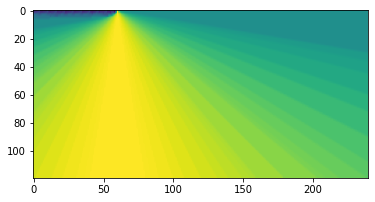

In [255]:
plt.imshow(psV)

#plt.figure(figsize=[40,40])
#plt.quiver(X,Z,np.nan_to_num(psV),np.nan_to_num(psH))

In [213]:
isx = 60
ix = int(np.round(1.5*nx/5))
iz = int(np.round(nz/3))
ini = [0,isx]
fin = [psV[ix,iz],psH[ix,iz]]
print(fin)

[0.0009608279654492805, -0.000279793763820535]


(0.0, 1.0)

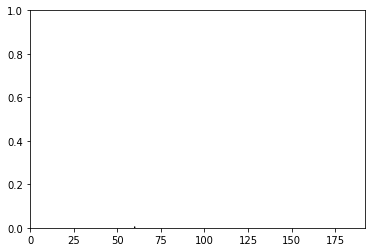

In [214]:
plt.arrow(isx,0,psH[ix,iz],psV[ix,iz])
plt.xlim(x[0],x[-1])
plt.ylim(z[0],1)

In [215]:
ini

[0, 60]

In [216]:
ix

72

In [217]:
fin

[0.0009608279654492805, -0.000279793763820535]

In [225]:
isx = 20
ix = 20
iz = 30

psV,psH,prV,prH = peso(TTh,dt,60,isx)

print((z[iz]-0)/(x[ix]-x[isx]))

inf


<ipython-input-225-812e8b6d69c8>:7: RuntimeWarning: divide by zero encountered in double_scalars
  print((z[iz]-0)/(x[ix]-x[isx]))


In [226]:
print(psV[iz,ix]/psH[iz,ix])

inf


<ipython-input-226-912470ac1449>:1: RuntimeWarning: divide by zero encountered in double_scalars
  print(psV[iz,ix]/psH[iz,ix])


In [227]:
psV2 = np.diff(TTh[:,:,:], axis=1)
psH2 = np.diff(TTh[:,:,:], axis=2)
print(psV2[isx,iz,ix]/psH2[isx,iz,ix])

12.082762530298384


In [228]:
(TTh[isx,iz,ix]-TTh[isx,iz-1,ix])/(TTh[isx,iz,ix]-TTh[isx,iz,ix-1])

-12.082762530298384

In [197]:
TTh.shape

(240, 120, 240)

In [173]:
A = np.array([1,3,3,4,5])
print(np.diff(A))

[2 0 1 1]


In [174]:
print(TTh[isx,iz,ix]-TTh[isx,iz,ix-1])
print(psH2[isx,ix,iz])

-0.0009393905132022567
-0.0009130288521349145


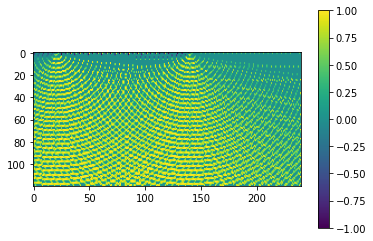

In [233]:
X = np.zeros([nz,nx])
Y = np.ones([nz,nx])
igx=20
isx=140
w=MigPreFuncoes.peso(TTh,dt,X,Y,igx,isx)
plt.imshow(w)
plt.colorbar()

In [257]:
def peso(TTh,dt,X,Y,igx,isx):
    """
    Calcula a função peso w(s,x,r)
    Entrada:
    TTh - tabela do tempo de trânsito calculada com a função raymodel3
    dt - discretização do tempo (s)
    X - componente X do modelo; X = np.sin(m_theta); X.shape = [nz,nx]
    Y - componente Y do modelo; Y = np.cos(m_theta); Y.shape = [nz,nx]
    igx - posição do receptor 
    isx - posição da fonte
    Saída:
    w - função peso (w.shape=[nz,nx])
    """
    
    #timer=np.round(TTh/dt)+1
    timer=TTh
    gH = np.gradient(timer, axis=2) #gradiente horizontal  #diferença entre colunas (do modelo de velocidade)
    gV = np.gradient(timer, axis=1) #gradiente vertical    #diferença entre linhas

    prV = gV[igx,:,:] 
    prH = gH[igx,:,:] 

    psV = gV[isx,:,:] 
    psH = gH[isx,:,:] 

    pH = psH + prH
    pV = psV + prV
    
    norma = np.sqrt(pH**2 + pV**2)

    for idx, x in np.ndenumerate(norma): #avoid nan's
        if x==0:
            norma[idx]=1e-16
            #print('oi')

    w = (pH/norma * X) + (pV/norma * Y) 
    
    return w,pH,pV,norma


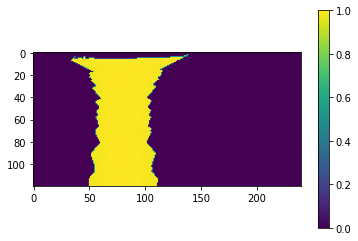

In [276]:
X = np.zeros([nz,nx])
Y = np.ones([nz,nx])
igx=20
isx=140
w,pH,pV,norma=peso(TTh,dt,X,Y,igx,isx)
mask=w>(1-0.02)
plt.imshow(w*mask)
plt.colorbar()

In [268]:
idxs.shape

(2, 16414)